<h1><strong>Data analysis </strong></h1>
<h4>Pipeline to best analyse distance data from images obtained using an ImageJ macro </h4>

### Carga de librerias




In [ ]:
# Para comenzar, cargar las siguientes librerias haciendo click en play (corre el codigo de la ventana)

import numpy as np

# Para dataframes
import pandas as pd

# Visualizaciones
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns

# Para cargar archivos
from google.colab import files
import io


### Cargar los datos y visualización


En esta primer sección vamos a importar los datos y ponerlos en un `Dataframe`.

In [ ]:
# Para cargar el archivo de datos, correr esta ventana
select_file = files.upload()

for fn in select_file.keys():
  nombre_de_archivo = "{name}".format(
      name=fn, length=len(select_file[fn]))

Saving aCSF 1201-1820.csv to aCSF 1201-1820.csv


In [ ]:
#Indico que voy a trabajar con el archivo seleccionado
df = pd.read_csv(io.BytesIO(select_file[nombre_de_archivo]))


Inspeccionamos como son los datos levantados con el método `.head()`

In [ ]:
df.head(10)

In [ ]:
# Correr este si queres ver todos las filas
pd.set_option('display.max_rows', None)

In [ ]:
# Saco la columna 'x'
# inplace=True es para que quede guardada la modificacion
df.drop(['x'], axis=1, inplace=True) # axis te dice si queres referirte a filas (axis=0) o a columnas(axis=1)


In [ ]:
#  Renombro la primer columna (columna 0) a 'x'
df.rename(columns={ df.columns[0]: "x" }, inplace = True)

In [ ]:
df

,x,1201 (Active diam APP PS1 6-9-20_t1200.tif),1202 (Active diam APP PS1 6-9-20_t1201.tif),1203 (Active diam APP PS1 6-9-20_t1202.tif),1204 (Active diam APP PS1 6-9-20_t1203.tif),1205 (Active diam APP PS1 6-9-20_t1204.tif),1206 (Active diam APP PS1 6-9-20_t1205.tif),1207 (Active diam APP PS1 6-9-20_t1206.tif),1208 (Active diam APP PS1 6-9-20_t1207.tif),1209 (Active diam APP PS1 6-9-20_t1208.tif),1210 (Active diam APP PS1 6-9-20_t1209.tif),1211 (Active diam APP PS1 6-9-20_t1210.tif),1212 (Active diam APP PS1 6-9-20_t1211.tif),1213 (Active diam APP PS1 6-9-20_t1212.tif),1214 (Active diam APP PS1 6-9-20_t1213.tif),1215 (Active diam APP PS1 6-9-20_t1214.tif),1216 (Active diam APP PS1 6-9-20_t1215.tif),1217 (Active diam APP PS1 6-9-20_t1216.tif),1218 (Active diam APP PS1 6-9-20_t1217.tif),1219 (Active diam APP PS1 6-9-20_t1218.tif),1220 (Active diam APP PS1 6-9-20_t1219.tif),1221 (Active diam APP PS1 6-9-20_t1220.tif),1222 (Active diam APP PS1 6-9-20_t1221.tif),1223 (Active diam APP PS1 6-9-20_t1222.tif),1224 (Active diam APP PS1 6-9-20_t1223.tif),1225 (Active diam APP PS1 6-9-20_t1224.tif),1226 (Active diam APP PS1 6-9-20_t1225.tif),1227 (Active diam APP PS1 6-9-20_t1226.tif),1228 (Active diam APP PS1 6-9-20_t1227.tif),1229 (Active diam APP PS1 6-9-20_t1228.tif),1230 (Active diam APP PS1 6-9-20_t1229.tif),1231 (Active diam APP PS1 6-9-20_t1230.tif),1232 (Active diam APP PS1 6-9-20_t1231.tif),1233 (Active diam APP PS1 6-9-20_t1232.tif),1234 (Active diam APP PS1 6-9-20_t1233.tif),1235 (Active diam APP PS1 6-9-20_t1234.tif),1236 (Active diam APP PS1 6-9-20_t1235.tif),1237 (Active diam APP PS1 6-9-20_t1236.tif),1238 (Active diam APP PS1 6-9-20_t1237.tif),1239 (Active diam APP PS1 6-9-20_t1238.tif),...,1781 (Active diam APP PS1 6-9-20_t1780.tif),1782 (Active diam APP PS1 6-9-20_t1781.tif),1783 (Active diam APP PS1 6-9-20_t1782.tif),1784 (Active diam APP PS1 6-9-20_t1783.tif),1785 (Active diam APP PS1 6-9-20_t1784.tif),1786 (Active diam APP PS1 6-9-20_t1785.tif),1787 (Active diam APP PS1 6-9-20_t1786.tif),1788 (Active diam APP PS1 6-9-20_t1787.tif),1789 (Active diam APP PS1 6-9-20_t1788.tif),1790 (Active diam APP PS1 6-9-20_t1789.tif),1791 (Active diam APP PS1 6-9-20_t1790.tif),1792 (Active diam APP PS1 6-9-20_t1791.tif),1793 (Active diam APP PS1 6-9-20_t1792.tif),1794 (Active diam APP PS1 6-9-20_t1793.tif),1795 (Active diam APP PS1 6-9-20_t1794.tif),1796 (Active diam APP PS1 6-9-20_t1795.tif),1797 (Active diam APP PS1 6-9-20_t1796.tif),1798 (Active diam APP PS1 6-9-20_t1797.tif),1799 (Active diam APP PS1 6-9-20_t1798.tif),1800 (Active diam APP PS1 6-9-20_t1799.tif),1801 (Active diam APP PS1 6-9-20_t1800.tif),1802 (Active diam APP PS1 6-9-20_t1801.tif),1803 (Active diam APP PS1 6-9-20_t1802.tif),1804 (Active diam APP PS1 6-9-20_t1803.tif),1805 (Active diam APP PS1 6-9-20_t1804.tif),1806 (Active diam APP PS1 6-9-20_t1805.tif),1807 (Active diam APP PS1 6-9-20_t1806.tif),1808 (Active diam APP PS1 6-9-20_t1807.tif),1809 (Active diam APP PS1 6-9-20_t1808.tif),1810 (Active diam APP PS1 6-9-20_t1809.tif),1811 (Active diam APP PS1 6-9-20_t1810.tif),1812 (Active diam APP PS1 6-9-20_t1811.tif),1813 (Active diam APP PS1 6-9-20_t1812.tif),1814 (Active diam APP PS1 6-9-20_t1813.tif),1815 (Active diam APP PS1 6-9-20_t1814.tif),1816 (Active diam APP PS1 6-9-20_t1815.tif),1817 (Active diam APP PS1 6-9-20_t1816.tif),1818 (Active diam APP PS1 6-9-20_t1817.tif),1819 (Active diam APP PS1 6-9-20_t1818.tif),1820 (Active diam APP PS1 6-9-20_t1819.tif)
0,1,166.000,164.000,166.000,170.000,169.000,164.000,166.000,168.000,167.000,166.000,170.000,170.000,169.000,168.000,165.000,161.000,166.000,159.000,162.000,166.000,166.000,168.000,165.000,159.000,162.000,172.000,158.000,160.000,166.000,152.000,154.000,166.000,166.000,158.000,157.000,152.000,153.000,149.000,147.000,...,159.000,161.000,161.000,162.000,162.000,158.000,163.000,162.000,162.000,161.000,165.000,164.000,161.000,161.000,164.000,163.000,162.000,163.000,165.000,158.000,163.000,163.000,160.000,161.000,158.0

### Grafico **x** vs. cada una de las otras columnas

In [ ]:
#dimensiones del dataframe
df.shape

(82, 621)

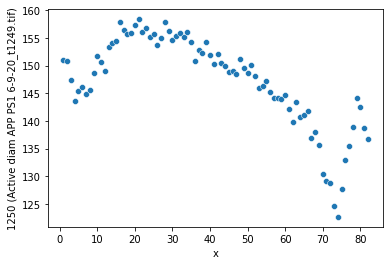

In [ ]:
# Grafico de la columna 'x' VS. la segunda columna (o sea la primera que no es X 😛 )
sns.scatterplot(data=df, x="x", y=df.columns[50])

## Limpio mis datos

In [ ]:
#Reemplazo filas (datos de intensidad) por un valor arbitrario que no me moleste
izq = 22
der = 50
for column in df.columns[1:]:
  df.loc[izq:der,str(column)] = df[str(column)].mean()+10

In [ ]:
# Borrar las primeras n filas (extremo inicial)
df.drop(df.head(7).index,inplace=True) #borrar las primeras n filas

In [ ]:
# Borrar las ultimas n filas (extremo final)
df.drop(df.tail(4).index,inplace=True)

In [ ]:
#Remover una columna especifica
df.drop(['320 (9-22-20 #2270 U46_t0319.tif)'], axis = 'columns', inplace=True) #eliminar esta columna en particular por nombre de imagen

In [ ]:
#Puedo eliminar columnas tambien (datos de imagenes)
df.drop(df.iloc[:, 1:150], inplace = True, axis = 1)

##Grafico todas las imagenes

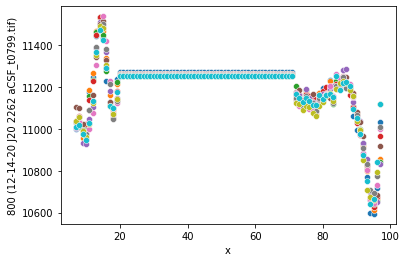

In [ ]:
# Grafico de X vs cada una de las columnas restantes
for i in df.columns[70:80]: #Se empieza desde el elemento 1 (el segundo) porque la primer columna es "x" y no nos interesa graficarla.

  sns.scatterplot(data=df, x="x", y=i)

# Decisión en función del perfil

In [ ]:
# Funciones para los posibles perfiles
# Se debe correr para que luego funcionen

# Maximo y minimo
def MaxMin(df):
  '''
  Calculan el indice del maximo y minimo valor de x y su diferencia

  input: Un dataframe
  output: una lista con las diferencias en x del maximo y el minimo
  '''
  difference = []


  for column in df.columns[1:]:
    print('Column Name: ', column)
    max_x = df.loc[df[column].idxmax(), 'x']
    min_x = df.loc[df[column].idxmin(), 'x']
        #Primer punto de x
    first_x = df.index[0]
    print('first_x: ', first_x)

    # Ultimo punto de x
    last_x = df[len(df) -1:].index[0]
    print('last_x: ', last_x)

    # Construimos la logica para evitar estar fuera de rango

    if (threshold + max_x < last_x): # Si al sumar el umbral por derecha no nos pasamos
      right_treshold = max_x + threshold

    else: # Si en cambio nos pasariamos, voy hasta el final
      print('entro a right_threshold')
      right_treshold = last_x

    if (threshold  - max_x < first_x): # Si al sumar el umbral por izquierda no nos pasamos
      left_treshold =  max_x - threshold
    else: # Si en cambio nos pasariamos, voy hasta el principio
      left_treshold = first_x

    print('maximo: ', max_x)
    print('left_treshold: ', left_treshold)
    print('right_treshold: ', right_treshold)
    print('minimo: ', min_x)
    df2 = df.drop(df.index[range(left_treshold,right_treshold+1, 1)]) # Borro el rango [left_treshold, right_treshold] y guardo en un nuevo dataframe
    min2_x = df2.loc[df2[column].idxmin(), 'x'] # Es el maximo absoluto en x, luego de borrar en base al threshold


    difference.append(max_x - min2_x)

  return difference

# Dos maximos
def dosMaximos(df, threshold):
  '''
  Calcula el indice de dos maximos

  input: Un dataframe
  output: una lista con las diferencias en x entre el maximo absoluto y un maximo relativo que esten a una distancia de al menos 'threshold'

  '''
  difference = []

  for column in df.columns[1:]:
    print('Column Name: ', column)
    max1_x = df.loc[df[column].idxmax(), 'x'] # Es el maximo absoluto en x
    #Primer punto de x
    first_x = df.index[0]

    # Ultimo punto de x
    last_x = df[len(df) -1:].index[0]

    # Construimos la logica para evitar estar fuera de rango

    if (threshold + max1_x < last_x): # Si al sumar el umbral por derecha no nos pasamos
      right_treshold = max1_x + threshold

    else: # Si en cambio nos pasariamos, voy hasta el final
      print('entro a right_threshold')
      right_treshold = last_x

    if (threshold  - max1_x < first_x): # Si al sumar el umbral por izquierda no nos pasamos
      left_treshold =  max1_x - threshold
    else: # Si en cambio nos pasariamos, voy hasta el principio
      left_treshold = first_x

    print('maximo: ', max_x)
    print('left_treshold: ', left_treshold)
    print('right_treshold: ', right_treshold)
    df2 = df.drop(df.index[range(left_treshold,right_treshold+1, 1)]) # Borro el rango [left_treshold, right_treshold] y guardo en un nuevo dataframe
    max2_x = df2.loc[df2[column].idxmax(), 'x'] # Es el maximo absoluto en x, luego de borrar en base al threshold
    print('nuevo_maximo: ',max2_x )
    difference.append(abs(max1_x - max2_x))

  return difference

# Dos minimos
def DosMinimos(df, threshold):
  '''
  Calcula el indice de dos minimos

  input: Un dataframe
  output: una lista con las diferencias en x entre el minimo absoluto y un minimo relativo que esten a una distancia de al menos 'threshold'
  '''
  difference = []

  for column in df.columns[1:]:
    print('Column Name: ', column)
    min1_x = df.loc[df[column].idxmin(), 'x'] # Es el minimo absoluto en x
    #Primer punto de x
    first_x = df.index[0]

    # Ultimo punto de x
    last_x = df[len(df) -1:].index[0]

    # Construimos la logica para evitar estar fuera de rango

    if (threshold + min1_x < last_x): # Si al sumar el umbral por derecha no nos pasamos
      right_treshold = min1_x + threshold
    else: # Si en cambio nos pasariamos, voy hasta el final
      print('entro a right_threshold')
      right_treshold = last_x # Ver la situacion donde borra para los dos lados todo, porque te pone como minimo el ultimo punto [que qusiera que de?]

    if (threshold - min1_x < first_x): # Si al sumar el umbral por izquierda no nos pasamos
      left_treshold = min1_x - threshold
    else: # Si en cambio nos pasariamos, voy hasta el principio
      left_treshold = first_x

    print('minimo: ', min1_x)
    print('left_treshold: ', left_treshold)
    print('right_treshold: ', right_treshold)
    df2 = df.drop(df.index[range(left_treshold,right_treshold+1, 1)]) # Borro el rango [left_treshold, right_treshold] y guardo en un nuevo dataframe
    min2_x = df2.loc[df2[column].idxmin(), 'x'] # Es el minimo absoluto en x, luego de borrar en base al threshold
    print('nuevo_minimo: ', min2_x )

    difference.append(abs(min2_x - min1_x))

  return difference


In [ ]:
def MaxMin_2(df):
  '''
  Calculan el indice del maximo y minimo valor de x y su diferencia

  input: Un dataframe
  output: una lista con las diferencias en x del maximo y el minimo
  '''
  difference = []


  for column in df.columns[1:]:
    print('Column Name: ', column)
    max_x = df.loc[df[column].idxmax(), 'x']
    #min_x = df.loc[df[column].idxmin(), 'x']
        #Primer punto de x
    first_x = df.index[0]
    print('first_x: ', first_x)

    # Ultimo punto de x
    last_x = df[len(df) -1:].index[0]
    print('last_x: ', last_x)

    # Construimos la logica para evitar estar fuera de rango

    if (threshold + max_x < last_x): # Si al sumar el umbral por derecha no nos pasamos
      right_treshold = max_x + threshold

    else: # Si en cambio nos pasariamos, voy hasta el final
      print('entro a right_threshold')
      right_treshold = last_x

    if (threshold  - max_x < first_x): # Si al sumar el umbral por izquierda no nos pasamos
      left_treshold =  max_x - threshold
    else: # Si en cambio nos pasariamos, voy hasta el principio
      left_treshold = first_x

    print('maximo: ', max_x)
    print('left_treshold: ', left_treshold)
    print('right_treshold: ', right_treshold)

    df2 = df.drop(df.index[range(left_treshold,right_treshold+1, 1)]) # Borro el rango [left_treshold, right_treshold] y guardo en un nuevo dataframe
    min2_x = df2.loc[df2[column].idxmin(), 'x'] # Es el maximo absoluto en x, luego de borrar en base al threshold
    print('minimo: ', min2_x)

    difference.append(max_x - min2_x)

  return difference

## Calculo los extremos segun el tipo de analisis elegido

In [ ]:
# Reseto el indice del df
df.reset_index(drop=True, inplace=True)

In [ ]:
# Definimos el tipo de analisis que puede ser: dosMaximos, maxMin, dosMinimos, maxMin_2 y completar en la siguiente linea, y luego lo corro

tipo_de_analisis = 'dosMinimos' #completar el tipo de analisis correcto

threshold = 40 #borra para ambos lados del primer maximo/minimo

if tipo_de_analisis == 'maxMin_2':
  difference = MaxMin(df)
elif tipo_de_analisis == 'dosMaximos':
  difference = dosMaximos(df, threshold)
elif tipo_de_analisis == 'maxMin_2':
  difference = MaxMin_2(df)
elif tipo_de_analisis == 'dosMinimos':
  difference = DosMinimos(df, threshold)
else:
  print('Elija una de estas opciones: dosMaximos, maxMin, dosMinimos')




Column Name:  1201 (Active diam APP PS1 6-9-20_t1200.tif)
entro a right_threshold
minimo:  70
left_treshold:  30
right_treshold:  81
nuevo_minimo:  7
Column Name:  1202 (Active diam APP PS1 6-9-20_t1201.tif)
entro a right_threshold
minimo:  75
left_treshold:  35
right_treshold:  81
nuevo_minimo:  8
Column Name:  1203 (Active diam APP PS1 6-9-20_t1202.tif)
entro a right_threshold
minimo:  71
left_treshold:  31
right_treshold:  81
nuevo_minimo:  7
Column Name:  1204 (Active diam APP PS1 6-9-20_t1203.tif)
entro a right_threshold
minimo:  71
left_treshold:  31
right_treshold:  81
nuevo_minimo:  7
Column Name:  1205 (Active diam APP PS1 6-9-20_t1204.tif)
entro a right_threshold
minimo:  72
left_treshold:  32
right_treshold:  81
nuevo_minimo:  7
Column Name:  1206 (Active diam APP PS1 6-9-20_t1205.tif)
entro a right_threshold
minimo:  71
left_treshold:  31
right_treshold:  81
nuevo_minimo:  8
Column Name:  1207 (Active diam APP PS1 6-9-20_t1206.tif)
entro a right_threshold
minimo:  67
left_t

In [ ]:
difference

[63,
 67,
 64,
 64,
 65,
 63,
 58,
 63,
 65,
 64,
 67,
 67,
 66,
 67,
 69,
 67,
 66,
 67,
 67,
 56,
 65,
 65,
 67,
 67,
 67,
 62,
 67,
 68,
 64,
 68,
 67,
 63,
 62,
 67,
 67,
 67,
 67,
 68,
 69,
 62,
 64,
 65,
 66,
 68,
 66,
 67,
 67,
 69,
 69,
 70,
 69,
 69,
 64,
 66,
 66,
 66,
 65,
 65,
 66,
 65,
 67,
 67,
 66,
 66,
 70,
 67,
 67,
 67,
 65,
 67,
 65,
 67,
 67,
 66,
 69,
 66,
 68,
 67,
 66,
 65,
 63,
 65,
 63,
 68,
 64,
 62,
 65,
 66,
 65,
 62,
 65,
 64,
 65,
 63,
 63,
 64,
 64,
 64,
 63,
 62,
 63,
 63,
 64,
 63,
 62,
 64,
 62,
 61,
 62,
 62,
 63,
 63,
 62,
 63,
 63,
 63,
 62,
 61,
 62,
 63,
 64,
 62,
 61,
 61,
 63,
 62,
 63,
 62,
 64,
 58,
 56,
 52,
 56,
 52,
 54,
 51,
 56,
 53,
 56,
 55,
 52,
 55,
 49,
 56,
 57,
 59,
 62,
 53,
 62,
 53,
 61,
 60,
 61,
 63,
 62,
 64,
 66,
 66,
 66,
 68,
 66,
 68,
 68,
 64,
 58,
 70,
 66,
 64,
 67,
 67,
 70,
 67,
 66,
 67,
 68,
 68,
 69,
 66,
 68,
 67,
 68,
 69,
 68,
 68,
 68,
 69,
 70,
 68,
 69,
 67,
 74,
 68,
 67,
 69,
 68,
 69,
 69,
 70,
 70,
 67,


##Grafico los resultados

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'diff_x'), Text(0.5, 0, 'num_imagen')]

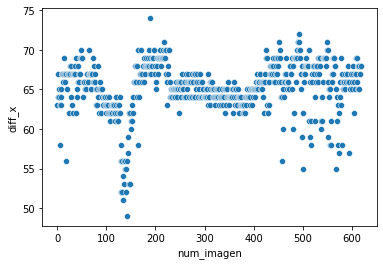

In [ ]:
diff_x =  [abs(ele) for ele in difference]

num_imagen =  [i for i in range(df.shape[1]-1)]

ax = sns.scatterplot(num_imagen, diff_x)

ax.set(xlabel='num_imagen', ylabel='diff_x')

In [ ]:

# correr siempre
# Permite eliminar valores atipicos en la medicion
df2  = pd.DataFrame(list(zip(num_imagen, diff_x)),
               columns =['num_imagen','diff_x' ])

# Agrego los nombres de las columnas, empizo de 1 y no de 0 porque la columna 'x' no me interesa en este caso

df2['column_name'] = df.columns[1:]



In [ ]:
# Sumo 1 para que el numero de imagen empiece en 1 en lugar de 0
df2.num_imagen = np.arange(1, len(df2)+1)

In [ ]:
# Correr para eliminar valores altos
threshold_altos = 70
df2.drop(df2[df2.diff_x > threshold_altos].index, inplace=True)

In [ ]:
# Correr para eliminar valores bajos
threshold_bajos = 60
df2.drop(df2[df2.diff_x < threshold_bajos].index, inplace=True)

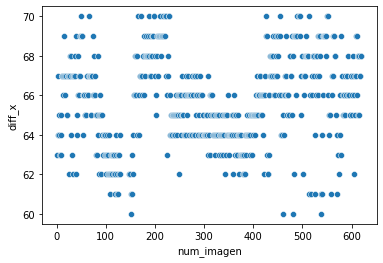

In [ ]:
sns.scatterplot(data=df2, x="num_imagen", y="diff_x")

In [ ]:
# Agrego columna que pasa de pixel a um
df2['um'] = df2.diff_x*0.26
df2


,num_imagen,diff_x,column_name,um
0,1,63,1201 (Active diam APP PS1 6-9-20_t1200.tif),16.38
1,2,67,1202 (Active diam APP PS1 6-9-20_t1201.tif),17.42
2,3,64,1203 (Active diam APP PS1 6-9-20_t1202.tif),16.64
3,4,64,1204 (Active diam APP PS1 6-9-20_t1203.tif),16.64
4,5,65,1205 (Active diam APP PS1 6-9-20_t1204.tif),16.90
5,6,63,1206 (Active diam APP PS1 6-9-20_t1205.tif),16.38
7,8,63,1208 (Active diam APP PS1 6-9-20_t1207.tif),16.38
8,9,65,1209 (Active diam APP PS1 6-9-20_t1208.tif),16.90
9,10,64,1210 (Active diam APP PS1 6-9-20_t1209.tif),16.64
10,11,67,1211 (Active diam APP PS1 6-9-20_t1210.tif),17.42


In [ ]:
df2.reset_index(drop=True, inplace=True)

indices = []
for x in range(len(df2['um'])-1):
  print('x normal: ', x)
  if x == 0:
    pass
  else:
    if df2['um'][x] > df2['um'][x-1]*1.1 or df2['um'][x] < df2['um'][x-1]*0.9:
      print('x en el if: ', x)
      indices.append(x)

x normal:  0
x normal:  1
x normal:  2
x normal:  3
x normal:  4
x normal:  5
x normal:  6
x normal:  7
x normal:  8
x normal:  9
x normal:  10
x normal:  11
x normal:  12
x normal:  13
x normal:  14
x normal:  15
x normal:  16
x normal:  17
x normal:  18
x normal:  19
x normal:  20
x normal:  21
x normal:  22
x normal:  23
x normal:  24
x normal:  25
x normal:  26
x normal:  27
x normal:  28
x normal:  29
x normal:  30
x normal:  31
x normal:  32
x normal:  33
x normal:  34
x normal:  35
x normal:  36
x normal:  37
x en el if:  37
x normal:  38
x normal:  39
x normal:  40
x normal:  41
x normal:  42
x normal:  43
x normal:  44
x normal:  45
x normal:  46
x normal:  47
x normal:  48
x normal:  49
x normal:  50
x normal:  51
x normal:  52
x normal:  53
x normal:  54
x normal:  55
x normal:  56
x normal:  57
x normal:  58
x normal:  59
x normal:  60
x normal:  61
x normal:  62
x normal:  63
x normal:  64
x normal:  65
x normal:  66
x normal:  67
x normal:  68
x normal:  69
x normal:  70


In [ ]:
indices

[37, 454, 456, 481, 502]

In [ ]:
df2.drop(indices, inplace=True)

In [ ]:
# descargo el dataframe como .csv

file_name = 'File.csv'
df2.to_csv(file_name, index= False)
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
percent_change = df2['um'].pct_change()
print(percent_change)

0           NaN
1      0.000000
2      0.010638
3      0.000000
4     -0.010526
5      0.010638
6      0.000000
7      0.010526
8     -0.020833
9      0.010638
10     0.000000
11     0.010526
12     0.000000
13     0.000000
14    -0.010417
15     0.000000
16     0.000000
17     0.010526
18     0.000000
19     0.010417
20     0.000000
21    -0.010309
22     0.020833
23     0.000000
24     0.000000
25     0.000000
26    -0.010204
27     0.010309
28     0.000000
29    -0.010204
30     0.000000
31    -0.010309
32     0.000000
33     0.020833
34    -0.051020
35     0.000000
36     0.043011
37     0.000000
38    -0.030928
39    -0.010638
40     0.000000
41     0.000000
42     0.000000
43     0.000000
44     0.043011
45     0.000000
46    -0.010309
47     0.010417
48     0.000000
49    -0.010309
50     0.000000
51     0.010417
52     0.000000
53    -0.041237
54     0.043011
55     0.010309
56    -0.010204
57     0.000000
58     0.000000
59     0.000000
60     0.000000
61     0.000000
62    -0

In [ ]:
# descargo el dataframe como .csv

file_name = 'File.csv'
percent_change.to_csv(file_name, index= False)
files.download(file_name)

### Promediando filas

In [ ]:
# Correr este si queres ver todos las filas
pd.set_option('display.max_rows', None)

In [ ]:
# Se elige una ventana y se promedia.
N_average = 10

# Recorto el antiguo dataframe (df2) para quedarme con unelemento cada 'N_average'
df_recortado = df2.iloc[::N_average]

df_recortado.reset_index(drop=True, inplace=True)

# Creo un nuevo dataframe con los promedios
df_promedios = df2['um'].groupby(np.arange(len(df2['um']))//N_average).mean()

# Agrego al df_recortatado los promedios
df_recortado['um average of ' + str(N_average) + ' points'] = df_promedios

df_recortado

In [ ]:
df2

In [ ]:
sns.scatterplot(data=df_recortado, x="num_imagen", y="um average of 10 points")

In [ ]:

# Para guardar el df recortado
file_name = 'File_RECORTADO.csv'
df_recortado.to_csv(file_name, index= False)
files.download(file_name)